In [42]:
from nltk.corpus import wordnet as wn
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import pandas as pd
import re
from nltk.corpus import sentiwordnet as swn
from nltk import word_tokenize
import matplotlib.pyplot as plt


The total score for "Tension" is determined by adding the scores for:

    Tense, Shaky, On Edge, Panicky, Relaxed, Uneasy, Restless, Nervous and Anxious

The total score for "Depression" is determined by adding the scores for:

    Unhappy, Sorry for Things Done, Sad, Blue, Hopeless, Unworthy, Discouraged, Lonely, Miserable, Gloomy, Desperate, Helpless, Worthless, Terrified and Guilty

The total score for "Anger" is determined by adding the scores for:

    Anger, Peeved, Grouchy, Spiteful, Annoyed, Resentful, Bitter, Ready to Fight, Rebellious, Deceived, Furious and Bad Tempered

The total score for "Fatigue" is determined by adding the scores for:

    Worn Out, Listless, Fatigued, Exhausted, Sluggish, Weary and Bushed

The total score for "Confusion" is determined by adding the scores for:

    Confused, Unable to Concentrate, Muddled, Bewildered, Efficient, Forgetful, and Uncertain About Things

The total score for "Vigour" is determined by adding the scores for:

    Lively, Active, Energetic, Cheerful, Alert, Full of Pep, Carefree and Vigorous


In [2]:
# get original POMS 
tension = ['Tense', 'Shaky', 'On Edge', 'Panicky', 'Relaxed', 'Uneasy', 'Restless', 'Nervous', 'Anxious']
depression = ['Unhappy', 'Sad', 'Blue','Hopeless', 'Unworthy', 'Discouraged', 'Lonely', 'Miserable',
              'Gloomy', 'Desperate', 'Helpless', 'Worthless', 'Terrified', 'Guilty']
anger = ['Anger', 'Peeved', 'Grouchy', 'Spiteful', 'Annoyed', 'Resentful', 'Bitter', 'Ready to Fight',
         'Rebellious', 'Deceived', 'Furious', 'Bad Tempered']
fatigue = ['Worn Out', 'Listless', 'Fatigued', 'Exhausted', 'Sluggish', 'Weary', 'Bushed']
confusion = ['Confused', 'Unable to Concentrate', 'Muddled', 'Bewildered', 'Efficient', 'Forgetful',
             'Uncertain About Things']
vigourous = ['Lively', 'Active', 'Energetic', 'Cheerful', 'Alert', 'Full of Pep', 'Carefree', 'Vigorous']

root_moods = [tension, depression, anger, fatigue, confusion, vigourous]

In [3]:
tot = 0
for i in root_moods:
    tot += len(i)
    
print(tot)

57


In [4]:
def clean_words_list(mood):
    return [word.lower().replace(' ', '_') for word in mood]


for n, mood in enumerate(root_moods):
    root_moods[n] = clean_words_list(mood)

    

Choosing to use Wordnet for Synsets, however OP used Sentiword & tradional thesauraus

In [5]:
def get_lemma_names(word):
    all_lemmas = []
    for ss in wn.synsets(word):
        all_lemmas += ss.lemma_names()
    return all_lemmas

def make_synon_list(mood):
    # concatenate all of the lemma lists
    # to the main mood list
    for word in mood:
        # add word lemmas to current word list
        word_lemmas = get_lemma_names(word)
        mood = mood + word_lemmas
    return mood

In [6]:
mood_names = ['tension', 'depression', 'anger', 'fatigue', 'confusion', 'vigourous']
moods_dict = {}

# 
for i, mood in enumerate(root_moods):
    moods_dict[mood_names[i]] = make_synon_list(mood)

# moods_dict

In [7]:
for mood in moods_dict:
    moods_dict[mood] = set(moods_dict[mood])

In [8]:
moods_dict

tot = 0
for i in moods_dict:
    tot += len(moods_dict[i])
    
print(tot)

432


### Stealing preproc

In [9]:
# df = pd.read_csv('./training.1600000.processed.noemoticon.csv')
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

stop_words = stopwords.words("english")

df = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [10]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
# limit tweets to ones which would obviously show emotion - same as OP
# df = df[df['text'].str.contains('feel|I\'m|makes me|I am')]
# ################## TEST

In [12]:
# https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

# %%time
df.text = df.text.apply(lambda x: preprocess(x))

In [13]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad see


In [14]:
# convert to date time, disregard the time element
df['date'] = pd.to_datetime(df['date']).dt.date

/home/franticoreo/.local/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [15]:
df

,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day
1,0,1467810672,2009-04-06,NO_QUERY,scotthamilton,upset update facebook texting might cry result...
2,0,1467810917,2009-04-06,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
3,0,1467811184,2009-04-06,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,2009-04-06,NO_QUERY,Karoli,behaving mad see
...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16,NO_QUERY,AmandaMarie1028,woke school best feeling ever
1599996,4,2193601969,2009-06-16,NO_QUERY,TheWDBoards,thewdb com cool hear old walt interviews
1599997,4,2193601991,2009-06-16,NO_QUERY,bpbabe,ready mojo makeover ask details
1599998,4,2193602064,2009-06-16,NO_QUERY,tinydiamondz,happy 38th birthday boo alll time tupac amaru ...


In [16]:
# for each tweet, create each mood score, 
# root_moods = [tension, depression, anger, fatigue, confusion, vigourous]
moods_dict

{'tension': {'aflutter',
  'anxious',
  'awkward',
  'decompress',
  'dying',
  'flighty',
  'frightened',
  'ill_at_ease',
  'loose',
  'loosen',
  'loosen_up',
  'make_relaxed',
  'nervous',
  'neural',
  'on_edge',
  'panic-stricken',
  'panic-struck',
  'panicked',
  'panicky',
  'precarious',
  'queasy',
  'relax',
  'relaxed',
  'restless',
  'rickety',
  'shaky',
  'shivering',
  'skittish',
  'slack',
  'slack_up',
  'slacken',
  'slow_down',
  'spooky',
  'strain',
  'tense',
  'tense_up',
  'terrified',
  'trembling',
  'unbend',
  'uneasy',
  'ungratified',
  'unlax',
  'unquiet',
  'unsatisfied',
  'unstrain',
  'unwind',
  'wobbly',
  'wonky'},
 'depression': {'Amytal',
  'abject',
  'admonish',
  'alone',
  'amobarbital_sodium',
  'aristocratic',
  'aristocratical',
  'blasphemous',
  'blue',
  'blue-blooded',
  'blue_air',
  'blue_angel',
  'blue_devil',
  'blue_sky',
  'blueing',
  'blueish',
  'blueness',
  'bluing',
  'bluish',
  'dark',
  'demoralised',
  'demoralize

can we some how map this dictionary

get tweet -> tokenize -> if tweet words match in dict key, cumsum -> append total to new column for mood

In [17]:
df['text'] = df.text.apply(lambda x: word_tokenize(x))

In [18]:
df

,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,"[awww, bummer, shoulda, got, david, carr, thir..."
1,0,1467810672,2009-04-06,NO_QUERY,scotthamilton,"[upset, update, facebook, texting, might, cry,..."
2,0,1467810917,2009-04-06,NO_QUERY,mattycus,"[dived, many, times, ball, managed, save, 50, ..."
3,0,1467811184,2009-04-06,NO_QUERY,ElleCTF,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,2009-04-06,NO_QUERY,Karoli,"[behaving, mad, see]"
...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16,NO_QUERY,AmandaMarie1028,"[woke, school, best, feeling, ever]"
1599996,4,2193601969,2009-06-16,NO_QUERY,TheWDBoards,"[thewdb, com, cool, hear, old, walt, interviews]"
1599997,4,2193601991,2009-06-16,NO_QUERY,bpbabe,"[ready, mojo, makeover, ask, details]"
1599998,4,2193602064,2009-06-16,NO_QUERY,tinydiamondz,"[happy, 38th, birthday, boo, alll, time, tupac..."


In [19]:
def mood_word_count(sent, mood):
    # if intersection of moods words and tweet are not empty
    # shows matched words
    ## TEST
#     if bool(frozenset(moods_dict[]).intersection(sent)):
#         matches = frozenset(moods_dict[mood]).intersection(sent)
    return(len(frozenset(moods_dict[mood]).intersection(sent)))
    

for name, mood in enumerate(moods_dict):
    df[mood_names[name]] = df.text.apply(lambda x: mood_word_count(x, mood))

In [20]:
df.head()

,target,ids,date,flag,user,text,tension,depression,anger,fatigue,confusion,vigourous
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,"[awww, bummer, shoulda, got, david, carr, thir...",0,0,0,0,0,0
1,0,1467810672,2009-04-06,NO_QUERY,scotthamilton,"[upset, update, facebook, texting, might, cry,...",0,0,0,0,1,0
2,0,1467810917,2009-04-06,NO_QUERY,mattycus,"[dived, many, times, ball, managed, save, 50, ...",0,0,0,0,0,0
3,0,1467811184,2009-04-06,NO_QUERY,ElleCTF,"[whole, body, feels, itchy, like, fire]",0,0,0,0,0,0
4,0,1467811193,2009-04-06,NO_QUERY,Karoli,"[behaving, mad, see]",0,0,0,0,0,0


In [21]:
# group by the date of tweets and sum - we only want to keep the moods scores and date
df_summed = df.groupby('date', as_index=False).sum()
df_summed = df_summed.drop(columns=['target', 'ids'])

df_summed.head()

,date,tension,depression,anger,fatigue,confusion,vigourous
0,2009-04-06,16,222,22,57,214,35
1,2009-04-07,59,801,99,258,1105,196
2,2009-04-17,12,199,9,41,204,40
3,2009-04-18,78,1269,98,371,1425,260
4,2009-04-19,122,1345,129,373,1646,370


### Daily Score Computation:

**Score of word = # of times word matches tweets in a day / # of matches of all words**

In [22]:
# get total amount 
df_summed['total_score'] = df_summed.drop(columns=['date']).sum(axis=1).astype(int)
df_summed.head(5)

,date,tension,depression,anger,fatigue,confusion,vigourous,total_score
0,2009-04-06,16,222,22,57,214,35,566
1,2009-04-07,59,801,99,258,1105,196,2518
2,2009-04-17,12,199,9,41,204,40,505
3,2009-04-18,78,1269,98,371,1425,260,3501
4,2009-04-19,122,1345,129,373,1646,370,3985


In [23]:
# compute row average for each mood against the total score for the day
def mood_avg(row):
    return row / df_summed['total_score'][row.name] * 100

df_avg = df_summed.drop(columns=['date']).apply(mood_avg, axis=1)

# remove total score as it is now meaningless

df_avg = df_avg.drop(columns=['total_score'])

### Scaling 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_avg[mood_names] = scaler.fit_transform(df_avg[mood_names])

In [25]:
df = pd.concat([df_summed['date'],df_avg], axis=1)


In [26]:
mood_names

['tension', 'depression', 'anger', 'fatigue', 'confusion', 'vigourous']

In [27]:
df.date.min(), df.date.max() 

(datetime.date(2009, 4, 6), datetime.date(2009, 6, 25))

In [29]:
df.to_pickle('./moods_procd.pickle')

### Load processed DF 

In [89]:
import pickle

df = pd.read_pickle('./moods_procd.pickle')

### Dow Jones Data  

In [87]:
def average_directional_movement_index(df, n, n_ADX):
    """Calculate the Average Directional Movement Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :param n_ADX: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    i = 0
    TR_l = [0]
    while i < df.index[-1]:
        TR = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean())
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean() / ATR)
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean() / ATR)
    ADX = pd.Series((abs(PosDI - NegDI) / (PosDI + NegDI)).ewm(span=n_ADX, min_periods=n_ADX).mean(),
                    name='ADX_' + str(n) + '_' + str(n_ADX))
    df = df.join(ADX)
    return df


In [105]:
dji_raw = pd.read_csv('./^DJI.csv'); dji_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-06,8016.160156,8016.160156,7862.200195,7975.850098,7975.850098,247400000
1,2009-04-07,7968.919922,7969.080078,7762.080078,7789.560059,7789.560059,276920000
2,2009-04-08,7788.680176,7887.520020,7750.850098,7837.109863,7837.109863,255350000
3,2009-04-09,7839.890137,8087.279785,7839.890137,8083.379883,8083.379883,462060000
4,2009-04-13,8082.020020,8113.410156,7963.750000,8057.810059,8057.810059,424250000


In [114]:
def change_adx(dji_df, n, n_adx):
    dji = average_directional_movement_index(dji_df, n,n_adx)
    num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', f'ADX_{n}_{n_adx}']
    dji[num_cols] = scaler.fit_transform(dji[num_cols])

    return dji[['Date', f'ADX_{n}_{n_adx}']]
    

In [138]:
dji = change_adx(dji_raw, 4, 4)

In [139]:
dji.columns

Index(['Date', 'ADX_4_4'], dtype='object')

In [140]:
dji['Date'] = pd.to_datetime(dji['Date'])

In [141]:
dji.Date.min(), dji.Date.max() 

(Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-24 00:00:00'))

In [142]:
dji.Date.min(), dji.Date.max() 

(Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-24 00:00:00'))

In [143]:
df.date.min(), df.date.max() 

(datetime.date(2009, 4, 6), datetime.date(2009, 6, 25))

In [144]:
import datetime
# from datetime import Tim

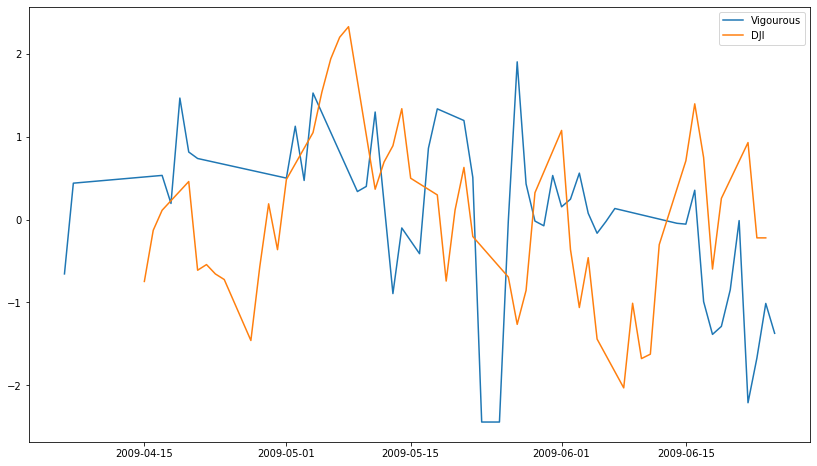

In [147]:
import matplotlib


plt.figure(figsize=(14,8))
# plt.plot(df['date'], df['tension'], label='Tension');
# plt.plot(df['date'], df['depression'], label='Depression');
# plt.plot(df['date'], df['anger'], label='Anger');
# plt.plot(df['date'], df['fatigue'], label='Fatigue');
# plt.plot(df['date'], df['confusion'], label='Confusion');
plt.plot(df['date'], df['vigourous'], label='Vigourous');
# plt.plot(dji['Date'], dji['Close'], label='DJI')
plt.plot(dji['Date'], dji['ADX_4_4'], label='DJI')
plt.legend();